In [3]:
using Pkg
Pkg.add("DifferentialEquations");
Pkg.add("SpecialFunctions");
#Pkg.add("StatsBase");

    Updating registry at `/opt/julia/registries/General`
   Resolving package versions...
   Installed PolyesterWeave ─────────────────── v0.1.7
   Installed LayoutPointers ─────────────────── v0.1.8
   Installed ConstructionBase ───────────────── v1.4.0
   Installed VectorizationBase ──────────────── v0.21.33
   Installed BandedMatrices ─────────────────── v0.16.13
   Installed DifferentialEquations ──────────── v7.1.0
   Installed DEDataArrays ───────────────────── v0.2.4
   Installed StochasticDiffEq ───────────────── v6.49.1
   Installed NLSolversBase ──────────────────── v7.8.2
   Installed libblastrampoline_jll ──────────── v3.1.0+2
   Installed FunctionWrappers ───────────────── v1.1.2
   Installed LevyArea ───────────────────────── v1.0.0
   Installed PoissonRandom ──────────────────── v0.4.1
   Installed CloseOpenIntervals ─────────────── v0.1.3
   Installed DiffEqNoiseProcess ─────────────── v5.12.0
   Installed OrdinaryDiffEq ─────────────────── v6.11.2
   Installed CPUSumma

In [4]:
using DifferentialEquations, Plots

## 1. Ordinary Differential Equations

### ODE 1

$$\frac{du(t)}{dt} = - \kappa u(t) \quad u(t_0) = 0.1, $$ 
where $u: \mathbb{R}^+\to\mathbb{R}^+$ and $\kappa = 0.25$.

Define your differential equation as a function that updates the LHS

In [5]:
function ode1!(du, u, p, t)
    κ = p
    du .= -κ.*u
end

ode1! (generic function with 1 method)

Set the initial condition, the time interval of interest and the parameters

In [6]:
u₀ = [0.1]

tspan = (0, 10)

κ = 0.25
p = [κ];

Create an ordinary differential equation problem with the variables defined above.

In [7]:
prob = ODEProblem(ode1!, u₀, tspan, p)

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 10)
u0: 1-element Vector{Float64}:
 0.1

Solve the ODE problem

In [8]:
sol = solve(prob)
# OR sol = solve(####, #### (algorithm name()); #### (parameters))

Plot your numerical solution 

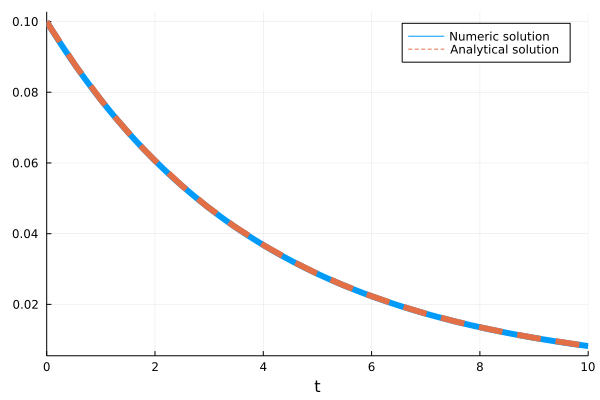

In [9]:
plot(sol, label = "Numeric solution", linewidth= 6.0) 
plot!(t -> u₀[1]*exp(-κ*t),  label = "Analytical solution", linewidth= 6.0, linestyle=:dash)

### ODE 2

$$d\begin{bmatrix}u_1(t) \\ u_2(t) \end{bmatrix} = \begin{bmatrix}-\kappa_1u_1(t)+u_2(t) \\ -\kappa_2u_1(t)u_2(t) \end{bmatrix}dt, \quad\quad \begin{bmatrix}u_1(0) \\ u_2(0) \end{bmatrix} = \begin{bmatrix}1 \\ 2 \end{bmatrix}.$$

Here, $u = (u_1, u_2)^\top$ and $\kappa_1 = 0.5$ and $\kappa_2 = 0.25$.

In [10]:
function ode2!(du, u, p, t)
    κ₁, κ₂ = p
    du .= [-κ₁*u[1]+u[2], 
           -κ₂*u[1]*u[2]]
end

ode2! (generic function with 1 method)

Set the initial condition, the time interval of interest and the parameters

In [11]:
u₀ = [1, 2]

tspan = (0, 10)

κ₁ = 0.5
κ₂ = 0.25
p = [κ₁, κ₂];

Create an ordinary differential equation problem with the variables defined above.

In [12]:
prob = ODEProblem(ode2!, u₀, tspan, p)

ODEProblem with uType Vector{Int64} and tType Int64. In-place: true
timespan: (0, 10)
u0: 2-element Vector{Int64}:
 1
 2

Solve the ODE problem

In [13]:
sol = solve(prob)
# OR sol2 = solve(prob2, #### (algorithm name); #### (parameters))

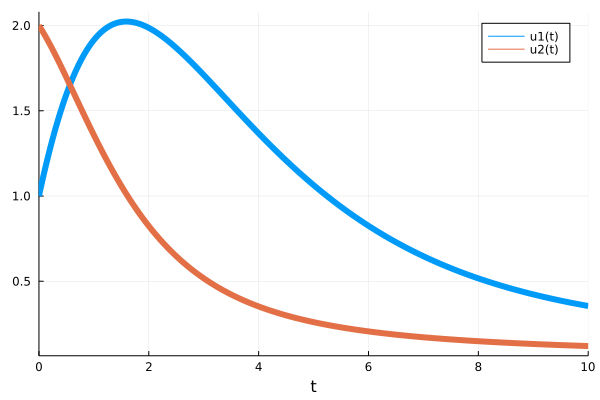

In [14]:
plot(sol, label = ["u1(t)" "u2(t)"], linewidth= 6.0) 

The object "sol" behaves like a function; for an arbitrary t, you can ask for sol(t). 

In [15]:
sol(10.0)

2-element Vector{Float64}:
 0.35486822476777363
 0.11976761491105567

## 2.Degradation and production (revisited)

(a) numerical solution to the chemical master equation 

In [16]:
function ME_degr_and_prod!(du, u, p, t)
    
    κ₁, κ₂, V = p

    u ./= sum(u) 

    u_padded = [0; u; 0]
    
    n = 0:length(u)-1
    
    a = -κ₁.*n .- κ₂*V
    b = (n.+1)*κ₁
    c = κ₂*V

    du .=  a.*u + b.*u_padded[3:end] + c*u_padded[1:end-2]
end

ME_degr_and_prod! (generic function with 1 method)

In [17]:
n_upperbound=24
u₀ = [1; zeros(n_upperbound)]

tspan = (0, 50)

κ₁, κ₂, V = [0.1, 1000, 0.001]
p = [κ₁, κ₂, V];

In [18]:
prob = ODEProblem(ME_degr_and_prod!, u₀, tspan, p)

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 50)
u0: 25-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [19]:
sol = solve(prob);
#sol = solve(prob, Tsit5(); dt=0.01)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 57-element Vector{Float64}:
  0.0
  0.0009990005004983772
  0.010989005505482149
  0.04857417416890508
  0.10652138158604843
  0.1759574101735114
  0.2669280280363636
  0.37864878022829973
  0.5191537297722533
  0.6955260633200333
  0.9153390708720146
  1.183078908419348
  1.5090413790635058
  ⋮
 24.138912733435
 24.73573216325989
 25.33255295277502
 26.526196697827384
 28.072969468323404
 30.526332052963134
 33.00377825555365
 36.320417212384775
 39.83393724905629
 44.236375992799225
 49.09303441904753
 50.0
u: 57-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.9990015481829916, 0.000997953198016281, 4.98452973993036e-7, 1.659766328213407e-10, 4.14506153330629e-14, 8.281093359105346e-18, 1.4236437908660304e-21, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [20]:
tvec = 0:0.05:50
xvec = sol(tvec).u'
xvec = permutedims(reshape(hcat(xvec...),(length(xvec[1]), length(xvec))))

1001×25 Matrix{Float64}:
 1.0         0.0          0.0         …   0.0           0.0
 0.951348    0.0474487    0.00118326      7.26426e-55   1.4127e-58
 0.905288    0.0900777    0.00448144     -5.35743e-53  -1.04593e-56
 0.861672    0.128286     0.00954967     -3.47055e-44  -6.34263e-47
 0.820359    0.162442     0.0160828       2.08843e-38   1.51351e-40
 0.781218    0.192883     0.0238115   …  -2.41008e-38  -2.0081e-40
 0.744126    0.219923     0.0324984       8.55186e-35   1.18805e-36
 0.708967    0.243846     0.041935       -4.09686e-35  -9.33308e-37
 0.675633    0.264919     0.0519382       5.27187e-32   1.08597e-33
 0.64402     0.283385     0.0623482       3.71941e-32   6.06261e-34
 0.614034    0.299468     0.0730261   …   4.62317e-31   6.84043e-33
 0.585582    0.313374     0.0838506       3.57045e-29   1.0072e-30
 0.558582    0.325293     0.0947176       4.53676e-29   1.09576e-30
 ⋮                                    ⋱                
 4.87265e-5  0.000483872  0.00240244      0.00

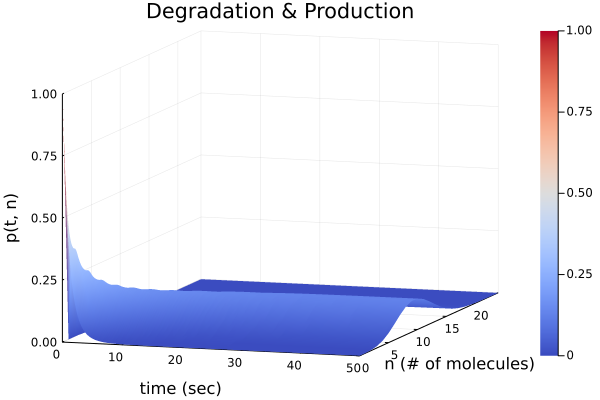

In [21]:
surface(tvec, 0:n_upperbound, xvec', 
    camera = (25, 30), 
    colour = :coolwarm, 
    xlabel = "time (sec)", 
    ylabel = "n (# of molecules)",
    zlabel = "p(t, n)",
    title = "Degradation & Production")

(b) validation with the steady-state solution $\phi(n)$ and Gillespie SSA

$\phi(n)$ (Exercise 1 - Problem 3c)

In [22]:
compute_ϕ = function(n_upperbound, κ₁, κ₂)
    
    ϕ = zeros(n_upperbound+1)

    ϕ[1] =  1.0
    ϕ[2] =  κ₂*V/κ₁ * ϕ[1];

    for n in 1:n_upperbound-1
       ϕ[n+2] = (κ₁*n*ϕ[n+1] + κ₂*V*ϕ[n+1] - κ₂*V*ϕ[n])/(κ₁*(n+1));
    end
    return ϕ./(sum(ϕ))
end

ϕ = compute_ϕ(n_upperbound, κ₁, κ₂);

Gillespie algorithm (Exercise 1 - Problem 3b)

In [23]:
# Compute the total propensity
using Distributions, StatsBase 

propensities = function(κ, x, ν, Nᵣ)
    ν_eval = zeros(Nᵣ)
    for r in 1:Nᵣ
        ν_eval[r] = ν[r](κ[r], x) 
    end
    return ν_eval
end

gillespie_alg = function(SM, κ, ν, x₀, stoptime)
    t = 0.0
    x = x₀
    
    Nₛ, Nᵣ = size(SM)
    
    tt = [t]
    xx = copy(x)     
    
    k=1
    
    while (t <= stoptime)
        
        # step 1
        ν_eval = propensities(κ, x, ν, Nᵣ)              
        α = sum(ν_eval) 

        # step 2
        τ = rand(Exponential(1/α))                                   
        t += τ

        # step 3
        index_j = StatsBase.sample(1:Nᵣ, Weights(ν_eval./α))
        
        x = x + SM[:, index_j]
        append!(tt, t)
        xx = cat(xx, x, dims=2)
    end
    
    return tt, xx'
end

#7 (generic function with 1 method)

In [24]:
# Number of reactions Nᵣ = 2

# Compute the stoichiometric matrix 
Products = [0; 1]
Reactants = [1; 0]
SM = (Products-Reactants)'

# Compute the propensity function for each of the reactions
ν₁ =  function(κ₁, x) return κ₁*x[1] end       # degradation
ν₂ = function(κ₂, x) return κ₂*V end           # production

#11 (generic function with 1 method)

In [26]:
N = 1e3                     #number of realisations
n_upperbound = 24
p = zeros(n_upperbound+1)   #vector of probabilities

for n in 1:N   
    tt, xx = gillespie_alg(SM, [κ₁, κ₂], [ν₁, ν₂], [0], 50)
    A = xx[end]    
    if (A <= n_upperbound) 
        p[xx[end]+1] += 1
    end
end

p /= N;

Histogram (Gillespie)

In [27]:
bar(collect(0:24), p, bar_width = 0.1,
    colour = :lightgrey,
    label = "Gillespie SSA",
    xlabel = "number of molecules",
    ylabel = "stationary distribution");

Numerical solution $p(t, n)$ at $t=T$.

In [28]:
plot(collect(0:n_upperbound), sol(tspan[2]), 
    label = "numeric solution",
    title = "p(t, n) @ t = ".*string(tspan[2]).*"sec",
    linewidth = 2,
    colour = :black);

Steady-state solution $\phi(n)$

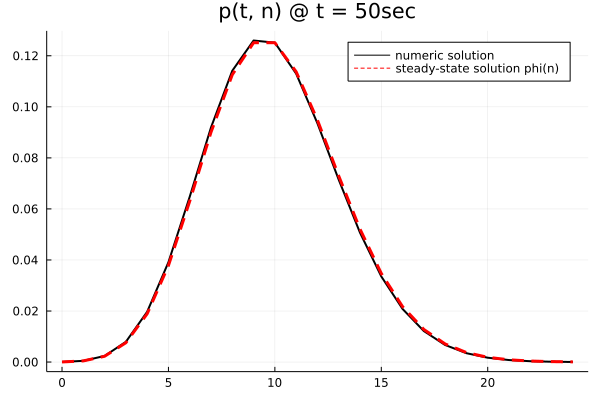

In [29]:
plot!(collect(0:n_upperbound), ϕ,
        linewidth = 3,
        colour = :red,
        label = "steady-state solution phi(n)", linestyle=:dash)

## 3. Dimerization and production

(a) numerical solution to the chemical master equation 

In [30]:
function ME_dim_and_prod!(du, u, p, t)
    
    κ₁, κ₂, V = p

    u ./= sum(u) 

    u_padded = [0; u; 0; 0]
    
    n = 0:length(u)-1 
    A = -κ₁ * (1/V) * (n.*(n.-1)/2 .- κ₂*V)
    B = κ₁ * (1/V) * (n.+2) .* (n.+1) / 2 
    C = κ₂ * (1/V)

    du .=  A .* u_padded[2:end-2] + B .* u_padded[4:end] + C * u_padded[1:end-3]
end

ME_dim_and_prod! (generic function with 1 method)

In [31]:
n_upperbound = 24
u₀ = [1; zeros(n_upperbound)]

tspan = (0, 50)
κ₁, κ₂, V = [0.005, 1, 1]
p = [κ₁, κ₂, V];

In [32]:
prob = ODEProblem(ME_dim_and_prod!, u₀, tspan, p)
#sol = solve(prob)
sol =  solve(prob, Tsit5(); dt=0.1, adaptive=false);

In [33]:
tvec = 0:0.01:50
xvec = sol(tvec).u'
xvec = permutedims(reshape(hcat(xvec...),(length(xvec[1]), length(xvec))))

5001×25 Matrix{Float64}:
 1.0         0.0         0.0          …  0.0         0.0         0.0
 1.00005     0.00995058  4.94922e-5      0.0         0.0         0.0
 1.0001      0.0198036   0.000196038     0.0         0.0         0.0
 1.00015     0.029561    0.000436807     0.0         0.0         0.0
 1.0002      0.0392246   0.00076906      0.0         0.0         0.0
 1.00024     0.0487962   0.00119014   …  0.0         0.0         0.0
 1.00029     0.0582776   0.00169749      0.0         0.0         0.0
 1.00034     0.0676704   0.00228863      0.0         0.0         0.0
 1.00039     0.0769762   0.00296117      0.0         0.0         0.0
 1.00043     0.0861968   0.00371282      0.0         0.0         0.0
 1.00048     0.0953337   0.00454136   …  0.0         0.0         0.0
 0.909157    0.0956781   0.00503361      0.0         0.0         0.0
 0.909202    0.10464     0.00602032      0.0         0.0         0.0
 ⋮                                    ⋱                          
 6.27812e-8 

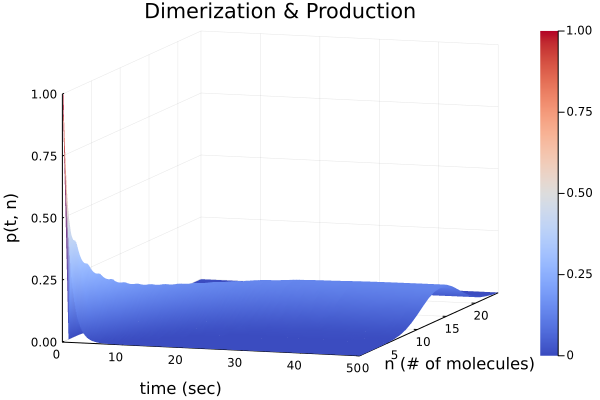

In [34]:
surface(tvec, 0:n_upperbound, xvec', 
    camera = (25, 30), 
    colour = :coolwarm, 
    xlabel = "time (sec)", 
    ylabel = "n (# of molecules)",
    zlabel = "p(t, n)",
    title = "Dimerization & Production")

(b) steady-state solution to the chemical master equation 

In [36]:
using SpecialFunctions
compute_ϕ = function(n_upperbound, κ₁, κ₂)
    
    ϕ = zeros(n_upperbound+1)

    for n in 0:n_upperbound
       ϕ[n+1] = (1/factorial(big(n))) * sqrt(κ₂*2*V^2/κ₁)^n * besseli(n-1, 2*sqrt(κ₂*2*V^2/κ₁))
    end
    return ϕ./(sum(ϕ))
end

ϕ = compute_ϕ(n_upperbound, κ₁, κ₂)

25-element Vector{Float64}:
 5.353340645375288e-8
 1.0843089071676345e-6
 1.0706681290750576e-5
 6.87183667142588e-5
 0.0003225301930012232
 0.0011808492184844418
 0.003513169761026681
 0.008736776061023249
 0.018541487675851714
 0.03411648770224447
 0.05511342173087868
 0.07896715568289732
 0.10120440581236947
 0.11684538914055229
 0.12227407482978915
 0.11659178112952047
 0.1017723162279849
 0.08165939910695519
 0.06044957494804622
 0.04142160733532141
 0.02635168492246991
 0.01560714919902379
 0.008626994167528079
 0.0044608465893508755
 0.002162335675361753

(c) validation of (a) and (b) with the Gillespie algorithm

In [37]:
# Number of reactions Nᵣ = 2
# Compute the stoichiometric matrix 
Products = [0; 1]
Reactants = [2; 0]
SM = (Products-Reactants)'

# Compute the propensity function for each of the reactions
ν₁ =  function(κ₁, x) return κ₁*x[1]*(x[1]-1)/(2*V) end
ν₂ = function(κ₂, x) return κ₂*V end 

#19 (generic function with 1 method)

In [38]:
N = 1e4                     #number of realisations
n_upperbound = 24
p = zeros(n_upperbound+1)   #vector of probabilities

for n in 1:N   
    tt, xx = gillespie_alg(SM, [κ₁, κ₂], [ν₁, ν₂], [0], 50.0)
    A = xx[end]    
    if (A <= n_upperbound) 
        p[xx[end]+1] += 1
    end
end

p /= N;

Histogram (Gillespie)

In [39]:
bar(collect(0:24), p, bar_width = 0.1,
    colour = :lightgrey,
    label = "Gillespie SSA",
    xlabel = "number of molecules",
    ylabel = "stationary distribution",
    legend = :topleft);

Numerical solution $p(t, n)$ at $t=T$.

In [40]:
plot!(collect(0:n_upperbound), sol(tspan[2]), 
    label = "numeric solution",
    title = "p(t, n) @ t = ".*string(tspan[2]).*"sec",
    linewidth = 2,
    colour = :black); 

Steady-state solution $\phi(n)$

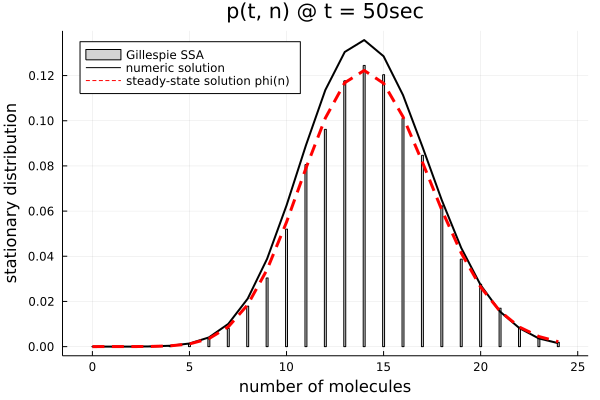

In [41]:
plot!(collect(0:n_upperbound), ϕ, 
        linewidth = 3,
        colour = :red,
        label = "steady-state solution phi(n)", linestyle=:dash)